In [23]:
import numpy as np 
from IPython.display import display,clear_output
import time
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from PIL import Image

In [2]:
def create_grid(rows:int,columns:int,dead_cell_ratio:float=0.95)->list[np.array]:
    """Creates a list of np.arrays filled with zeros and ones representing 
    dead and alive cells
    """
    arr = [] 
    for row in range(rows):
        inner_arr = np.random.choice([0,1],size=columns,p=[dead_cell_ratio,1-dead_cell_ratio])
        arr.append(inner_arr)
    return np.array(arr) 

def update_grid(grid)->list[np.array]:
    """Updates the whole grid based on the rules"""
    rows,columns = grid.shape
    next_grid = grid 
    for row in range(rows):
        for col in range(columns):
            next_grid[row][col] = apply_rules(grid,row,col)
    
    return next_grid
            


def apply_rules(grid:list[np.array],row:int,col:int)->int:
    """Apply the rules of life for a specific point in the grid"""
    
    point = grid[row][col]
    kernel = get_kernel(grid,row,col)
    alive_cells = (kernel == 1).sum() - point 
    
    # dead cell turning alive
    if point == 0 and alive_cells == 3:
        return 1
    
    # check if cell stays alive 
    if point == 1 and alive_cells in [3,2]:
        return 1 
    
    return 0 


def get_kernel(grid:list[np.array],row:int,col:int)->list[np.array]:
    """Provides you a slice of the dataframe based on the game of life rules   
    """
    
    row_bound,column_bound = grid.shape 
    
    # we need to check the edges 
    
    start_row = row - 1 if row-1 >=0 else 0 
    end_row =  row + 2 if row+2 <= row_bound else row_bound
    
    start_col = col -1 if col-1 >=0 else 0 
    end_col =  col +2 if col+2 <= column_bound else column_bound
    
    return grid[start_row:end_row,start_col:end_col]
    
    

    
    
    


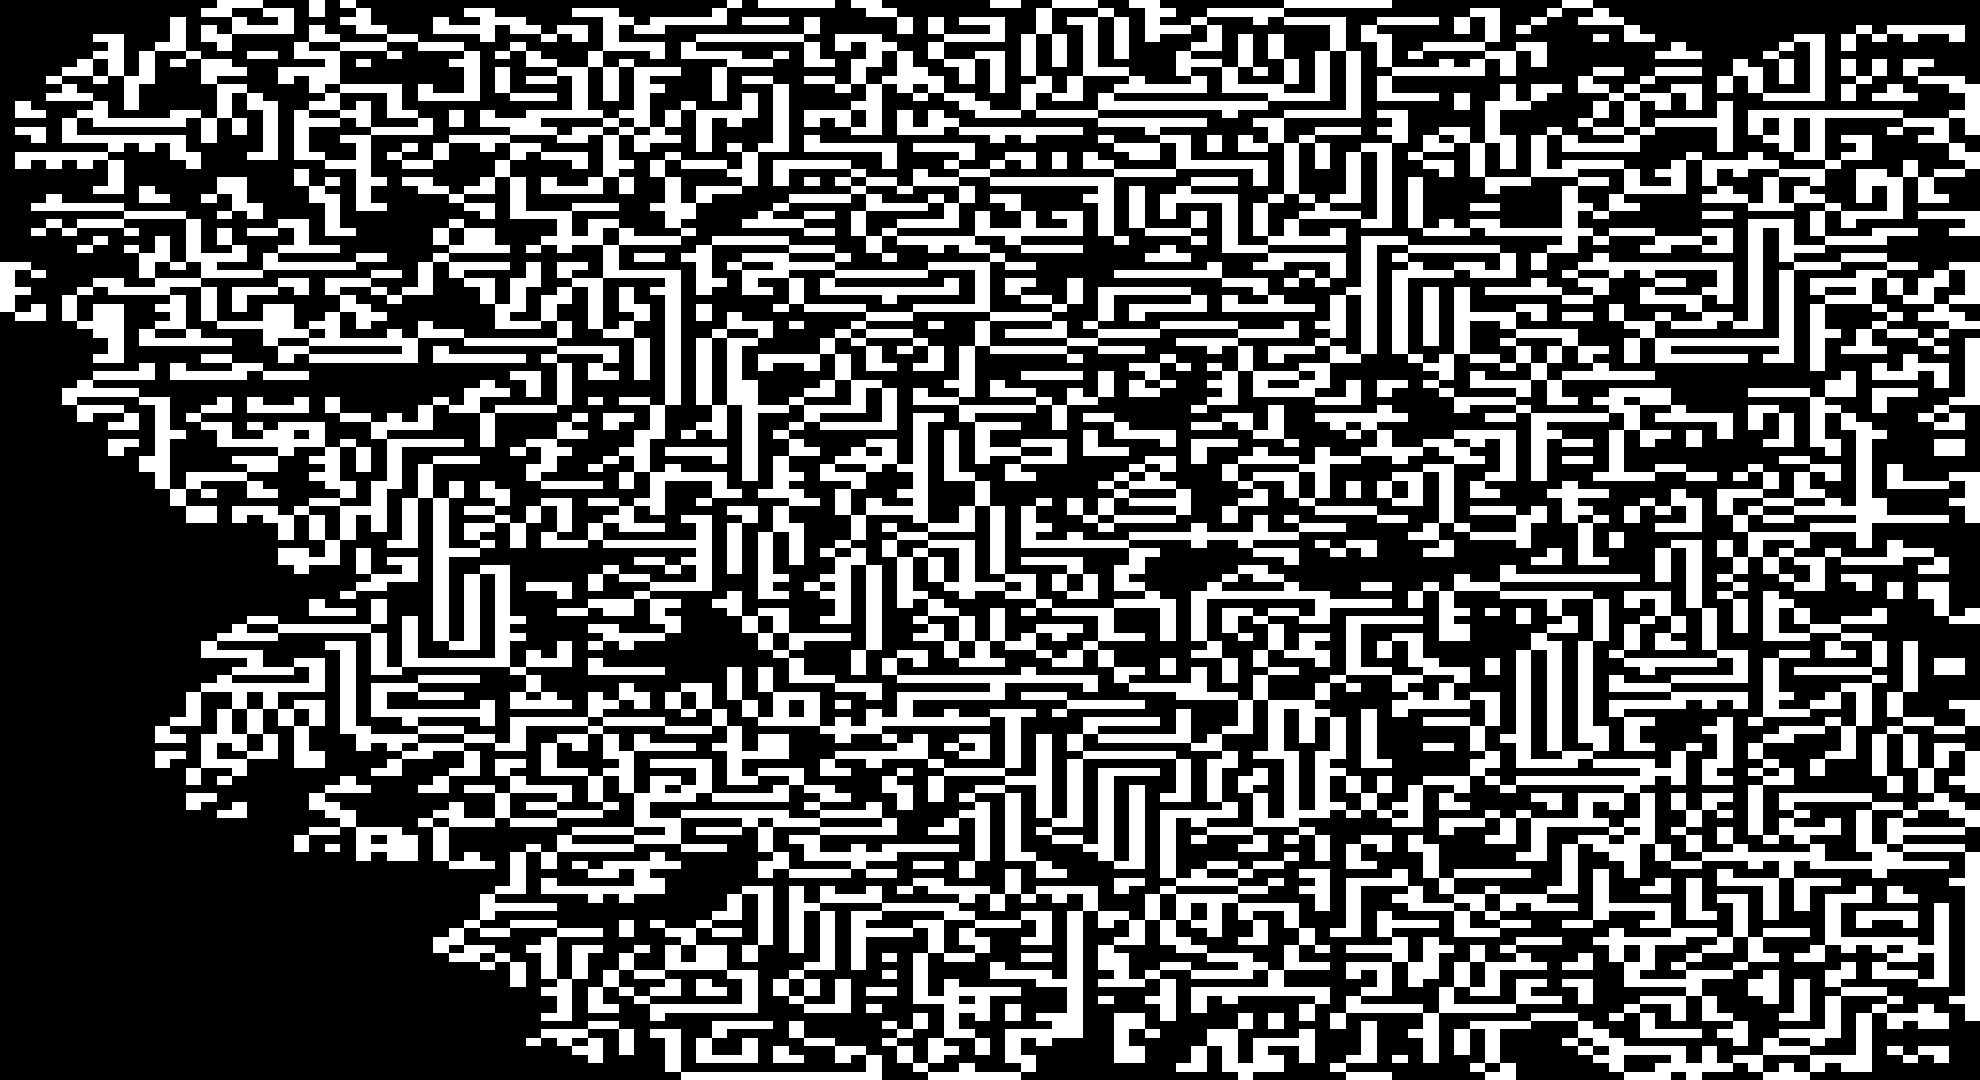

KeyboardInterrupt: 

In [44]:
grid = create_grid(128,128,.92)
while True:
    time.sleep(.1)
    grid = update_grid(grid)
    img = Image.fromarray(grid.astype('uint8')*255)
    img = img.resize((1980,1080),resample=Image.NEAREST)
    clear_output(wait=True)
    display(img,)
    